In [80]:
import os
import random
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from PIL import Image

In [87]:
def plot_bounding_boxes(image_path, label_path, ax):
    image = Image.open(image_path)
    ax.imshow(image)

    with open(label_path, 'r') as label_file:
        lines = label_file.readlines()

    for line in lines:
        parts = line.split(" ")
        class_id, x, y, width, height = map(float, parts)
        image_width, image_height = image.size
        x *= image_width
        y *= image_height
        width *= image_width
        height *= image_height
        rect = Rectangle((x - width / 2, y - height / 2), width, height, linewidth=2, edgecolor='red', facecolor='none')
        ax.add_patch(rect)

In [88]:
def draw_samples(ds_dir):
    images_folder = os.path.join(ds_dir, 'images')
    labels_folder = os.path.join(ds_dir, 'labels')

    image_files = os.listdir(images_folder)
    random.shuffle(image_files)

    selected_images = []
    for image_file in image_files:
        image_path = os.path.join(images_folder, image_file)
        label_path = os.path.join(labels_folder, os.path.splitext(image_file)[0] + '.txt')

        if os.path.exists(label_path) and os.path.getsize(label_path) > 0:
            selected_images.append((image_path, label_path))
            if len(selected_images) == 10:
                break

    fig, axes = plt.subplots(2, 5, figsize=(15, 4))
    axes = axes.ravel()

    for i, (image_path, label_path) in enumerate(selected_images):
        plot_bounding_boxes(image_path, label_path, axes[i])
        axes[i].set_xticks([])
        axes[i].set_yticks([])
#         axes[i].set_title(f"Image {i+1}")

    plt.tight_layout()
    plt.show()

In [23]:
!ls ../datasets/yolov8_original/valid

images       labels       labels.cache


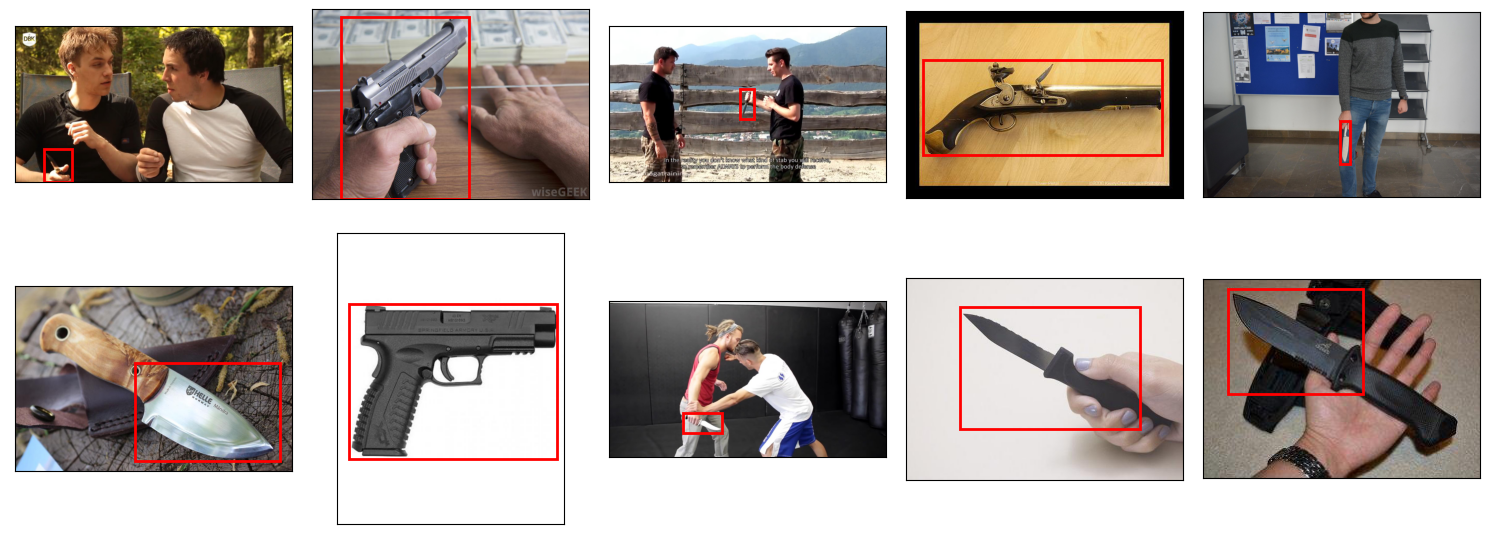

In [25]:
draw_samples("../datasets/yolov8_original/valid")

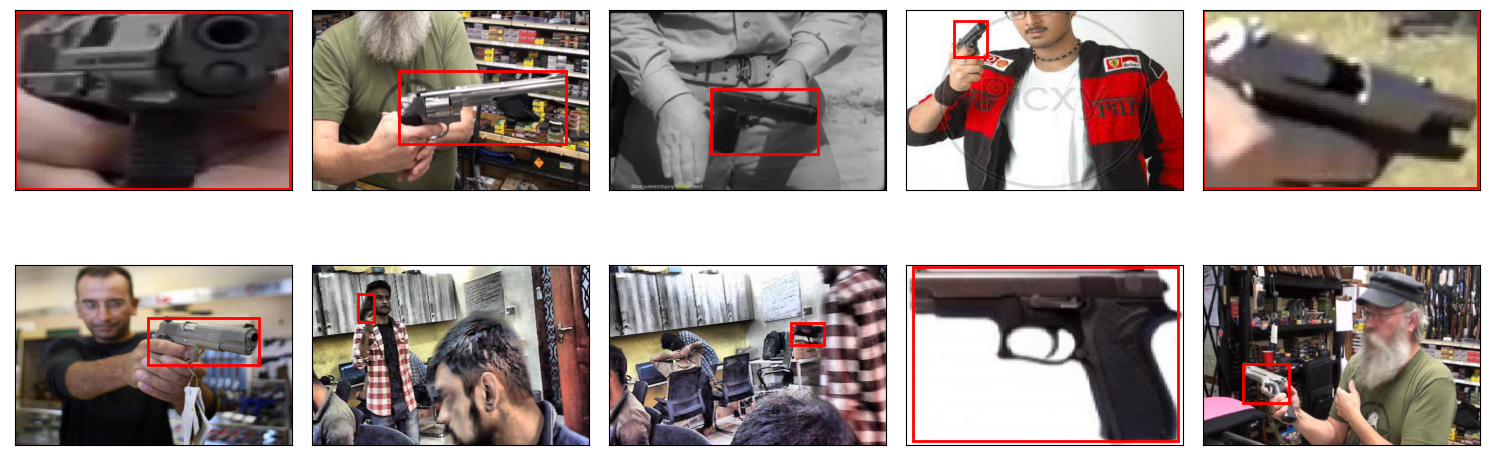

In [59]:
draw_samples("../datasets/yolov8_original_v2/valid")

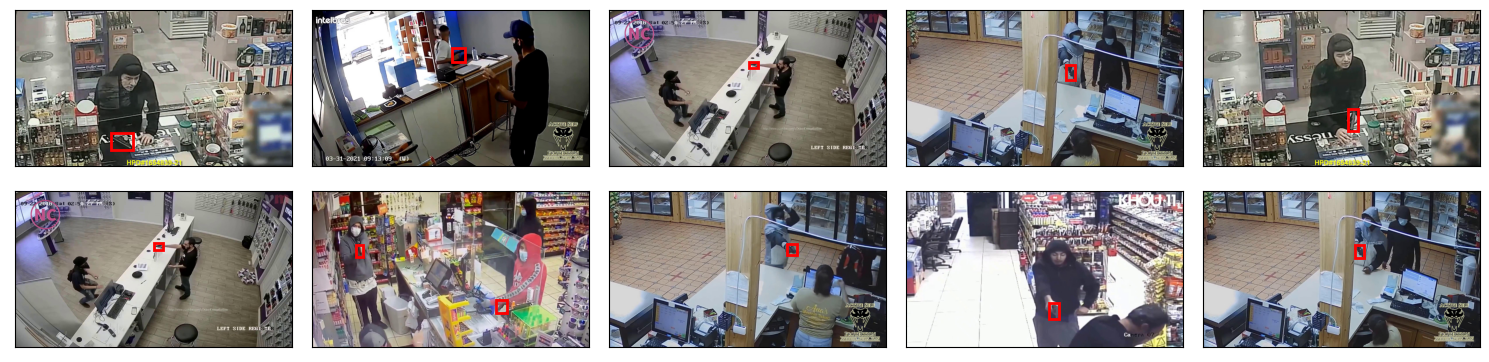

In [92]:
draw_samples("../datasets/yolov8_guns_only_no_empty/valid")

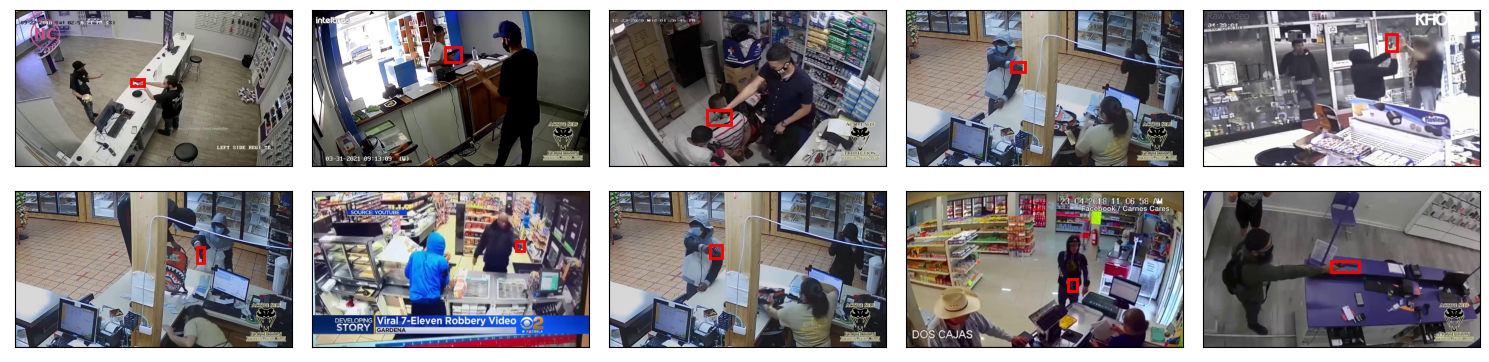

In [93]:
draw_samples("../datasets/yolov8_guns_only_no_empty/valid")

../datasets/yolov8_original_v2/train/images/WhatsApp-Video-2022-03-10-at-1-42-41-PM--1--036_jpg.rf.95bc7e321a61168d3bb9638b24b8e555.jpg
../datasets/yolov8_original_v2/train/images/WIN_20220310_13_29_51_Pro-119_jpg.rf.5634ea868ef897062164f21c149c568b.jpg
../datasets/yolov8_original_v2/train/images/2-0837_jpg.rf.646e4652ad81b72b511c71b15f99ca52.jpg
../datasets/yolov8_original_v2/train/images/y2mate-com---FN-FNX45-Tactical_480p-075_jpg.rf.8750ba6fd2abc7c375ebb0f88bdff9d7.jpg
../datasets/yolov8_original_v2/train/images/Czech-CZ-52-7-62x25mm-194_jpg.rf.fa721e84793202fbf36179ae4a3dfd4e.jpg
../datasets/yolov8_original_v2/train/images/FBI-Boston_-Armed-Robbery-of-Convenience-Store-in-Dedham--Massachusetts-093_jpg.rf.f70f21474111389b2933bc63eb65bf97.jpg
../datasets/yolov8_original_v2/train/images/armas--1976-_jpg.rf.7e31d932eed512899ba014aec9e9c7ad.jpg
../datasets/yolov8_original_v2/train/images/armas--1855-_jpg.rf.5c77aac4ab6fdfa1b846f8dacad881a3.jpg
../datasets/yolov8_original_v2/train/images

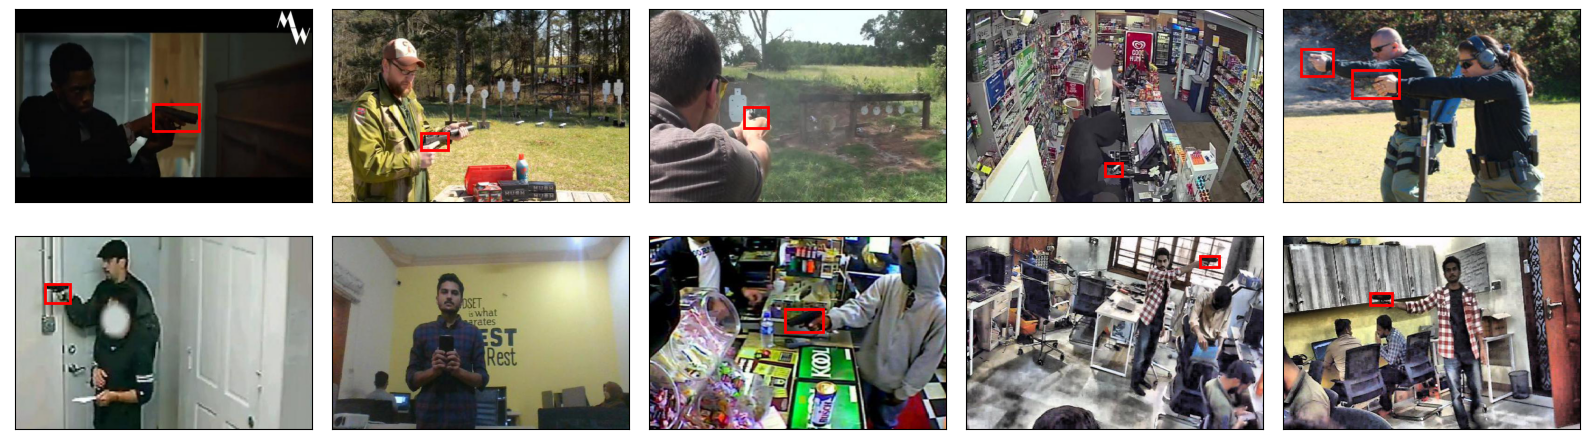

In [86]:
def draw_samples(ds_dir, selected_images):
    images_folder = os.path.join(ds_dir, 'images')
    labels_folder = os.path.join(ds_dir, 'labels')
    
    image_files = ["WhatsApp-Video-2022-03-10-at-1-42-41-PM--1--036_jpg.rf.95bc7e321a61168d3bb9638b24b8e555",
                    "WIN_20220310_13_29_51_Pro-119_jpg.rf.5634ea868ef897062164f21c149c568b",
                    "2-0837_jpg.rf.646e4652ad81b72b511c71b15f99ca52",
                    "y2mate-com---FN-FNX45-Tactical_480p-075_jpg.rf.8750ba6fd2abc7c375ebb0f88bdff9d7",
                    "Czech-CZ-52-7-62x25mm-194_jpg.rf.fa721e84793202fbf36179ae4a3dfd4e",
                    "FBI-Boston_-Armed-Robbery-of-Convenience-Store-in-Dedham--Massachusetts-093_jpg.rf.f70f21474111389b2933bc63eb65bf97",
#                     "armas--2048-_jpg.rf.f6670b793037212f1f5e2fef3f08233b",
                    "armas--1976-_jpg.rf.7e31d932eed512899ba014aec9e9c7ad",
                    "armas--1855-_jpg.rf.5c77aac4ab6fdfa1b846f8dacad881a3",
                    "11-018_jpg.rf.13a9ad2fb7d663fa8755c5643c912e4e",
                  "armas--249-_jpg.rf.35f82112200c78effabad8762044b9fa"]

    for image_file in image_files:
        image_path = os.path.join(images_folder, image_file+".jpg")
        print(image_path)
        label_path = os.path.join(labels_folder, image_file + '.txt')

        if os.path.exists(label_path):
            selected_images.append((image_path, label_path))
            if len(selected_images) == 10:
                break
    
    return selected_images

def draw_samples2(ds_dir):
    selected_images = draw_samples(os.path.join(ds_dir, 'train'), [])
    selected_images = draw_samples(os.path.join(ds_dir, 'valid'), selected_images)
    selected_images = draw_samples(os.path.join(ds_dir, 'test'), selected_images)
    
    fig, axes = plt.subplots(2, 5, figsize=(16, 5))
    axes = axes.ravel()

    for i, (image_path, label_path) in enumerate(selected_images):
        plot_bounding_boxes(image_path, label_path, axes[i])
        axes[i].set_xticks([])
        axes[i].set_yticks([])
#         axes[i].set_title(f"Image {i+1}")

    plt.tight_layout()
    plt.show()


draw_samples2("../datasets/yolov8_original_v2/")